# Funcion de costo para la regresion logistica
En la clase anterior encontramos la **hipotesis** correspondiente al problema de la regresion logistica. Esta hipotesis es central en la consecusion de la funcion de costo.

El objetivo de la clase de hoy es:
1. Encontrar la funcion de costo de la regresion logisitica
2. Encontrar el gradiente de la funcion de costo de la regresion logistica.
3. Frontera de decision (decision boundary)
4. Definir el problema multiclase (mas de dos clases).

Supogongamos un modelo binario donde se quiere clasificar dos tipos de animales
1. perros
2. gatos

Vamos a la estadistica.
Definamos la hipotesis del problema con $x^{(i)}$ es una muestra del espacio muestral. $x^{(i)}$ o es perro o es gato. Definimos la hipotesis como sigue

$$h(\theta, x^{(i)}) = p(y_i = \text{gato} | x^{(i)}; \theta) = S(x^{(i)}, \theta) = \frac{1}{1 + \mathrm{e}^{- (x^{(i)})^T \theta}} $$



Entonces, la probabilidad de que $x^{(i)}$ sea un perro es:

$$p(y_i = \text{perro} | x^{(i)}, \theta)=1 - p(y_i=\text{gato}  | x^{(i)}, \theta) = 1 - h(\theta, x^{(i)}) $$

Existe una forma ingeniosa de combinar estas dos probabilidades (yo la aprendi de un video de YouTube)
Es la siguiente

$$p(y_i | x^{(i)}, \theta) = h(\theta, x^{(i)})^{y_i} (1 - h(\theta, x^{(i)})^{1 - y_i}. $$

Se verifica que si $y_i=1$ tengemos la probabilidad de "gato" y si $y_i=0$ tenemos la probabilidad de "perro".


Este problema es clasico de la estadistica. Se llama un
[Bernoulli trial](https://en.wikipedia.org/wiki/Bernoulli_trial).
Da lugar a la distribucion binomial.


Ahora, queremos calcular la probabilidad de todos eventos juntos. Se tiene un "zoologico" pero con solo perros y gatos. La idea es que los eventos son idenpendientes. es decir que es perro o es gato pero no puede existir algo en el medio.

Entonces

$$\mathcal{L}(\theta) = p(Y | X; \theta) = \prod_{i=1}^m h(\theta, x^{(i)})^{y_i} (1 - h(\theta, x^{(i)})^{1 - y_i}  $$

donde $\mathcal{L}(\theta)$ se llama **likelihood** (verosimilitud).

Recuerden que estamos buscando funciones de costo (objetivo, de perdida o ...)

La idea es **maximizar** el **likelihood**.
Aparentemente ya encontramos la funcion de costo que queremos maximizar. Pero hay dos problemas.

1. Un productoria no es nada amigable para maximizar.
2. Queremos es el minimo, no el maximo. Esto se arregla facil, cambio de signo.

Para el problema 1.  sacamos el logaritmo

$$\log \mathcal{L}(\theta) = \log p(Y | X; \theta) = \sum_{i=1}
^m y_i \log [ h(\theta, x^{(i)}) + (1 - y_i) \log  (1 - h(\theta, x^{(i)}) $$

Ahora negamos la expresion para buscar un minimo en vez de un maximo, y multiplicamos por $1/m$ (es como una normalizacion), Pero esto no cambia donde este el minimo (maximo).




$$ J(\theta)= - \frac1m \sum_{i=1}
^m y_i \log [ h(\theta, x^{(i)})] + (1 - y_i) \log [ (1 - h(\theta, x^{(i)})] \tag{0} $$


# Gradiente de funcion de costo para la regresion logistica.
Calculamos el gradiente para cada uno de los terminos de la suma y luego lo sumamos (por que la derivada de la suma es la suma de las derivadas)

$\theta=(\theta_1, \theta_2, \cdots, \theta_n)$

$$\frac{\partial y_i \log[ h(\theta, x^{(i)}]}{\partial \theta_k} = y_i \frac{1}{S} S' x_{ik} = y_i \frac{1}{\cancel{S}} \cancel{S}(1-S) x_{ik} = y_i (1 -S) x_{ik} \tag{1} $$

Ahora, con el segundo termino
$$\require{cancel}$$
$$\frac{\partial (1 - y_i) \log [1 - h(\theta, x^{(i)})]}{\partial \theta_k} = -(1 - y_i) \frac{1}{\cancel{1-S}} S(\cancel{1-S}) x_{ik} =
(y_i -1) S x_{iK} \tag{2} $$



Sumando las dos expresiones (la (1) y la (2)encontramos

\begin{eqnarray} \frac{\partial y_i \log[ h(\theta, x^{(i)}]}{\partial \theta_k}  + \frac{\partial (1 - y_i) \log [1 - h(\theta, x^{(i)})]}{\partial \theta_k} &=& y_i(1-S) x_{ik} + (y_i-1) S x_{ik} \\
&=& y_i x_{ik} -y_i S x_{ik} +  y_i S x_{ik} - S x_{ik} \\
&=& (y_i - S) x_{ik} \\
&=& -( h(x^{(i)}, \theta) - y_i) x_{ik}
\end{eqnarray}

El signo "-" lo tomamos en la suma (0), y sumando todo encontramos

$$\frac{\partial J(\theta)}{\partial \theta_k} = \frac1m \sum_{i=1}^m (h(\theta, x^{(i)})-y_i) x_{ik}  $$

# Frontera de Decision (Decision Boundary)
Recuerde la hipotesis

$$h(\theta, x^{(i)}) = S( (x^{(i)})^T \theta) =
\frac{1}{1 + \mathrm{e}^{- {x^{(i)}}^T \theta}}$$

Aca $x^{(i)}$ es una muestra $i$ (vector) $\theta$ es una columna de parametros $(\theta_1, \theta_2, \cdots, \theta_n)^T$
que queremos optimizar. El producto $t= (x^{(i)})^T \theta$ es un numero que esta en el invervalo $(-\infty, \infty)$. Sin embargo $S = h(\theta, x^{(i)})$ esta entre 0 y 1 $[0,1]$
$S$ describe

$$p(y=1 | x^{(i)}, \theta) $$
la probabilidad de que la muestra $x^{(i)}$ tenga un valor (tag) de 1, dado $\theta$.  La probabilidad $S$ no es suficiente para tener una clasificacion binaria. Debemos introducir un umbral $\gamma$, en este caso pensemos en $\gamma=0.5$ y definimos
una hipotesis binaria como sigue.


\begin{eqnarray}
h_{binaria} =
\left \{
    \begin{array}{cc}
    1  & \text{ si } S(x^{(i)} \theta) > \gamma \\
    0 & \text{ de otro lado}
    \end{array}
    \right .
\end{eqnarray}




El caso **divisiorio** importante es cuando $x^{(i)} \theta = 0$
Alli la probabilidad es exactmente $1/2$. De cero a la izquierda
la probabilidad esta por debajo de 1/2 y de cero a la dereha por encima de un medio. $0$ es a linea divisoria.

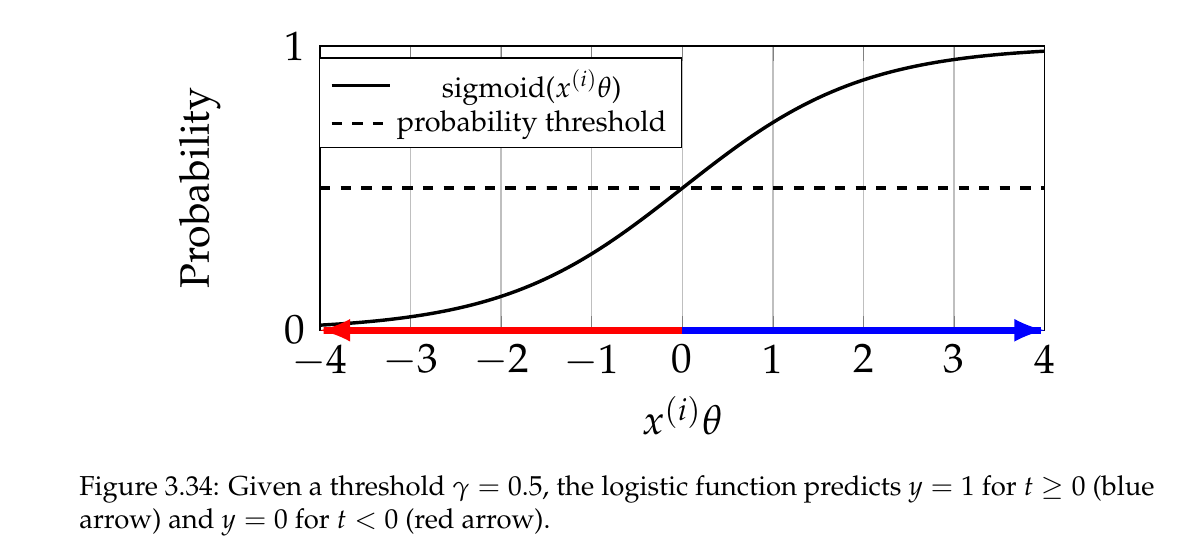

Que siginifica ${x^{(i)}}^T \theta$ en dos dimensiones?


${x^{(i)}}^T=(x_1^{(i)}, x_2^{(i)}) \quad , \quad $
$\theta=(\theta_0 , \theta_1)$
El producto es

$$\theta_0 x_1^{(i)} + \theta_1 x_2^{(i)} = 0 $$
Esto es la linea. Veamos un ejemplo que ustedes mismos van a generar en su proxima tarea.




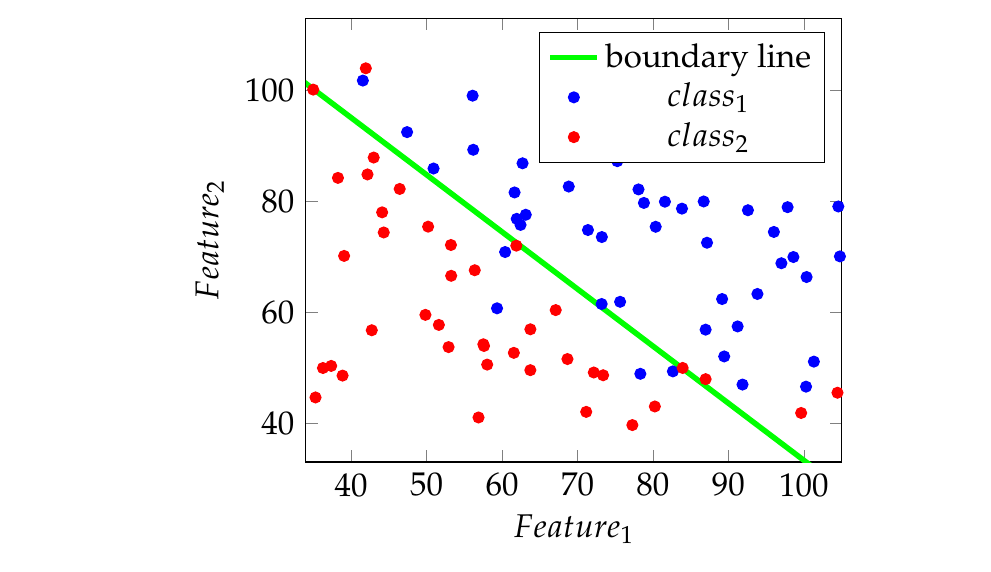

## Como se encuentra esa linea divisoria?

1. Use la hipoteis $S$ con la funcion de costo (0).
2. Use el metodo del gradiente para optimizar por $\theta$
3. Grafique la ecuacion $x^T \theta=0$, Esta ecuacion es una linea, o un plano, o un hiperplano si $x \in \mathbb{R}^n$.

Como podemos resolver fronteras de decision mas generales?
Puedo usar composicion de funciones.  Por ejemplo

$$h(\theta, X) = S ( g(\theta, X)) $$

$g(\theta, X)$ puede ser una ecuacio no lineal
por ejemplo, en su tarea de la proxima semana encontran
que $g(\theta, X)$ es un polinomio de grado 8 (en dos variables)

$$g(\theta, X) = \sum_{i=0}^8 \sum_{j=0}^i \theta_{[i(i+1)/2 + j]} x_2^j x_1^{i-j}$$

Los pasos a seguir son:

1. Use la hipoteis $S$ con la funcion de costo (0).
2. Use el metodo del gradiente para optimizar por $\theta$
3. Grafique la ecuacion $g(\theta, X)=0$, Esta ecuacion es una linea, o un plano, o un hiperplano si $x \in \mathbb{R}^n$.


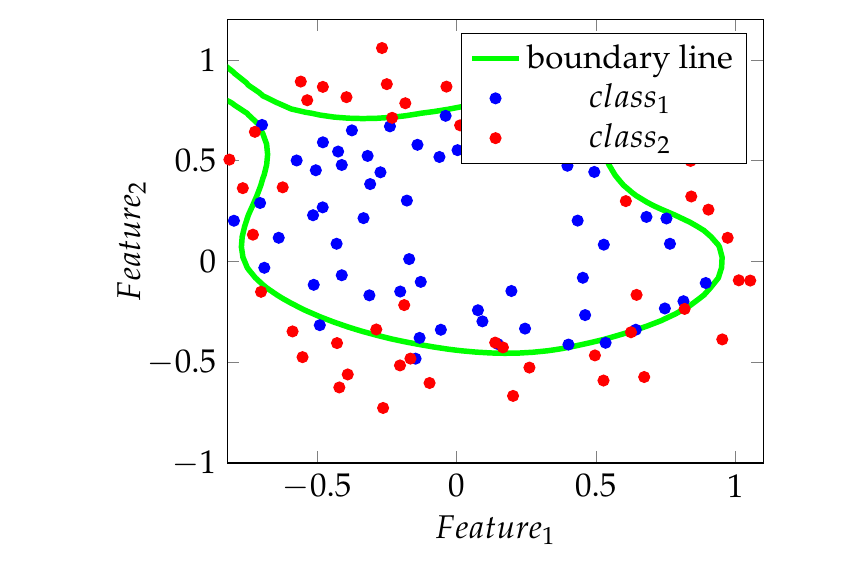

La cola al rededor de $(-0.5,1)$ podria indicar un sobreajuste.
Regularizacion es sugerida para esto.

## Regularizacion logistica.

$$ J(\theta)= - \frac1m \sum_{i=1}
^m y_i \log [ h(\theta, x^{(i)})] + (1 - y_i) \log [ (1 - h(\theta, x^{(i)})] + \frac{\lambda}{2 m} \| \theta \|^2 $$

Luego de regularizacion encontramos

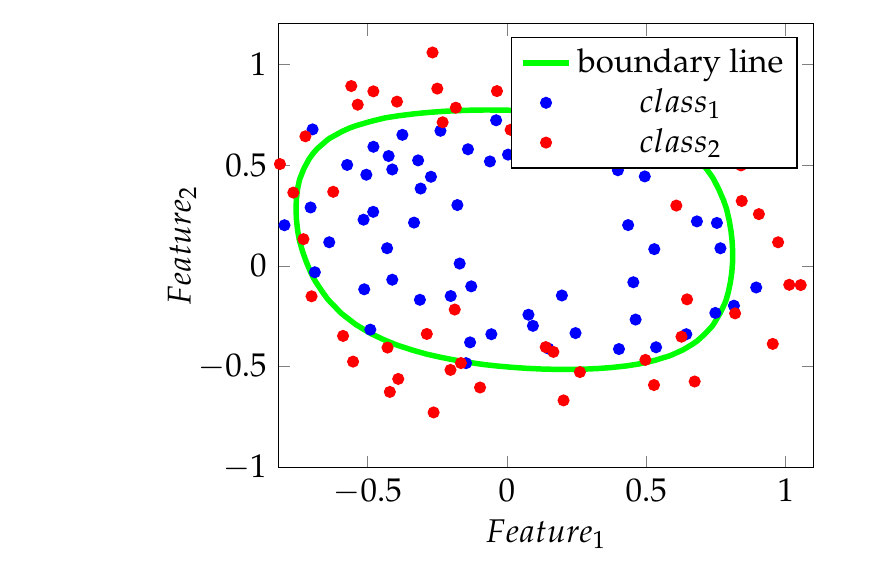

Comenzamos el tema de multiclase y lo terminamos en la proxima clase.

# Clasificacion multiclase.
Hasta el dia de hoy nos hemos enfocado en problemas binarios
* Perro contra gato
* Cancer contra no cancer
* si contra no
* rojo contra azul.
* Etc.

Pero la clasificacion es algo mas general. Que tal que tengamos
por ejemplo perros, gatos y elefantes.

Voy a explicar tres tecnicas para clasificar multiclase (3 o mas)

* La funcion **softmax**
* one-hot encoding (codificacion del uno calienta)
* one-vs-all (uno contra todos, uno contra el resto, one-vs-rest).

